In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import matplotlib.patches as patches
import matplotlib.image as mpimg
import cmath

In [2]:
def sign_function(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return -1

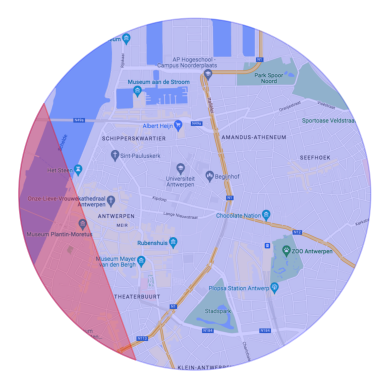

In [3]:
def fill_in_circle(point1, point2):
    """
    fills in the smaller part of the circle with red and the larger part with blue.
    point1 ([x1, y1]) is the first intersecting point between the division line and the 
    circle, point2 is the second one.
    """ 
    
    figure, axes = plt.subplots()

    #background
    image = plt.imread('plattegrond.png')
    im = axes.imshow(image, extent = [-10,10,-10,10])
    #patch = patches.Circle((-50, -50), radius=1000, transform=axes.transData)
    #im.set_clip_path(patch)


    # define circle
    Drawing_uncolored_circle = plt.Circle( (0, 0),
                                          10, fill ="b", color="blue",alpha=0.2)

    # define polygon
    coord = []
    point1_x = point1[0]
    point1_y = point1[1]
    point2_x = point2[0]
    point2_y = point2[1]
    angle_point1 = cmath.polar(complex(point1_x, point1_y))[1]
    angle_point2 = cmath.polar(complex(point2_x, point2_y))[1]
    #print(angle_point1)
    #print(angle_point2)
    theta = angle_point2-angle_point1
    #print(theta)
    if theta > np.pi:
        theta = -(2*np.pi-theta)
    if theta < -np.pi:
        theta = -(-2*np.pi-theta)
    #print(theta)
    for delta in np.arange(0, theta, sign_function(theta)*0.001):
        new_angle = angle_point1+delta
        coord.append([10*np.cos(new_angle), 10*np.sin(new_angle)])
    Drawing_colored_polygon = plt.Polygon(coord,closed=True, color="red",alpha=0.3)

    # add the figures
    axes.add_artist( Drawing_uncolored_circle )
    axes.add_artist( Drawing_colored_polygon )

    # set axis properties
    plt.xlim([-10.5, 10.5])
    plt.ylim([-10.5, 10.5])
    axes.set_aspect('equal', 'box')
    plt.axis('off')

    # show the final image
    plt.show()
    
    
# testing
point1_x = -8.57
point1_y = 5.16
point2_x = -3.34
point2_y = -9.42
fill_in_circle([point1_x, point1_y], [point2_x, point2_y])